In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.visualization import plot_histogram

In [2]:
circuit = QuantumCircuit(3,3)

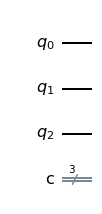

In [26]:
%matplotlib inline

circuit.draw(output = 'mpl')

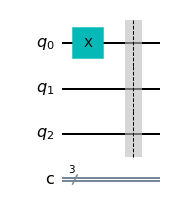

In [27]:
circuit.x(0)
circuit.barrier()
circuit.draw()

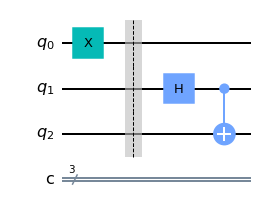

In [28]:
circuit.h(1)
circuit.cx(control_qubit=1, target_qubit=2)
circuit.draw()

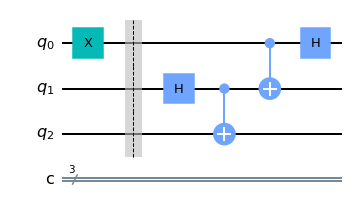

In [29]:
circuit.cx(control_qubit=0, target_qubit=1)
circuit.h(0)
circuit.draw()

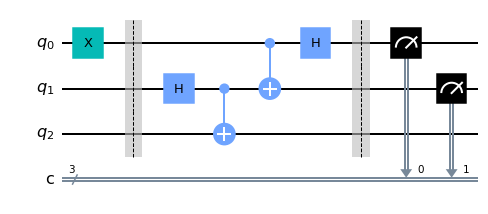

In [30]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw()

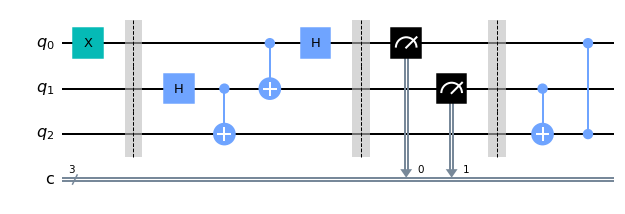

In [31]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw()

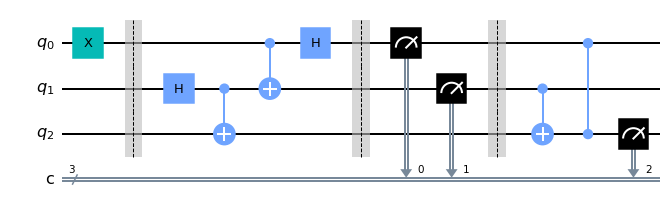

In [32]:
circuit.measure(2,2)
circuit.draw()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


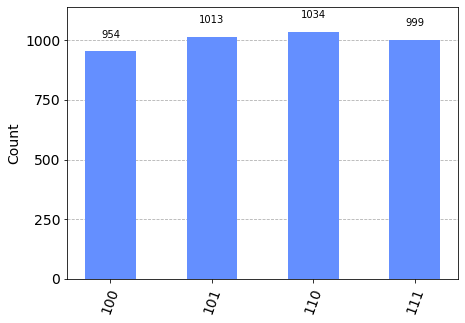

In [33]:
back_end = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=back_end, shots = 4000).result()
counts = result.get_counts()
plot_histogram(counts)

In [34]:
print(counts)

{'100': 954, '110': 1034, '111': 999, '101': 1013}


#### Another Circuit

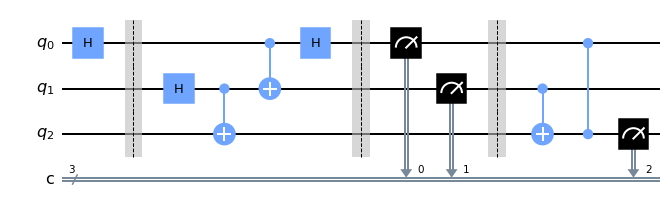

In [35]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.barrier()
qc.h(1)
qc.cx(1,2)
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.measure([0,1], [0,1])
qc.barrier()
qc.cx(1,2)
qc.cz(0,2)
qc.measure(2,2)
qc.draw()

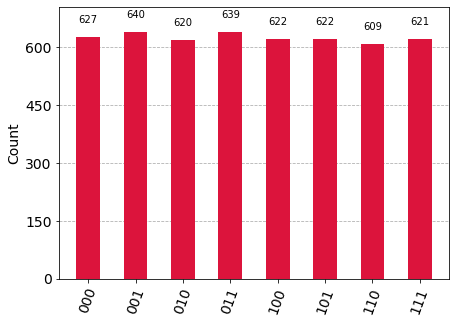

In [36]:
b = Aer.get_backend('qasm_simulator')
r = execute(qc, backend = b, shots = 5000).result()
c = r.get_counts()
plot_histogram(c, color='crimson')

In [25]:
def teleport_qubit_state(state):
    
    teleport = QuantumRegister(1, name="teleport")
    alice = QuantumRegister(1, name="alice")
    bob = QuantumRegister(1, name="bob")
    
    c_teleport = ClassicalRegister(1, name='teleport_qubit_measurement')
    c_alice = ClassicalRegister(1, name='alice_qubit_measurement')
    c_bob = ClassicalRegister(1, name='bob_qubit_measurement')
    
    qc = QuantumCircuit(teleport, alice, bob,c_teleport, c_alice, c_bob)
    
    # Alice and Bob share an entangled pair of qubits
    qc.h(alice)
    qc.cnot(control_qubit=alice, target_qubit=bob)
    
    # Alice prepares her special qubit in a certain state...
    qc.initialize(state, teleport)  # 0th qubit is the teleport qubit that Alice wants to teLeport to Bob
    
    # Alice performs a measurement on her two qubits in the so-called "Bell basis" (which is just undoing the entanglement and measuring in computational basis)
    qc.cnot(control_qubit=teleport, target_qubit=alice)
    qc.h(teleport)
    qc.measure([0,1], [0,1])
    
    qc.x(bob).c_if(c_alice, 1)
    # qc.cx(control_qubit=c_alice, target_qubit=bob)    # This line will throw an error becasue the usual qc.cx() expects a quantum bit as control, not a classical one
    qc.z(bob).c_if(c_teleport, 1)
    # qc.cz(control_qubit=c_teleport, target_qubit=bob) # This line will throw an error becasue the usual qc.cz() expects a quantum bit as control, not a classical one
    
    qc.measure(bob, c_bob)
    
    return qc

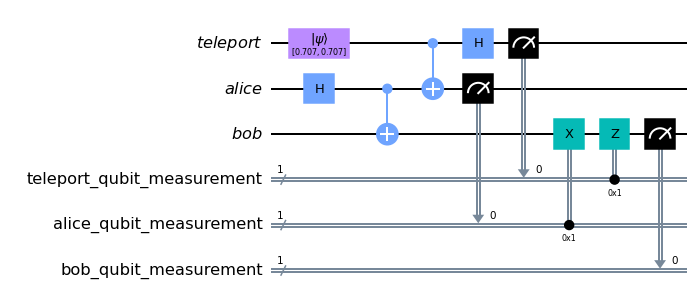

In [30]:
import numpy as np

s = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

teleportation_circuit = teleport_qubit_state(s)

teleportation_circuit.draw(output='mpl')

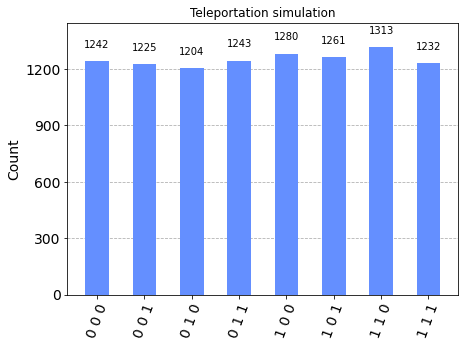

In [31]:
sim = Aer.get_backend('aer_simulator')
sim_job = execute(teleportation_circuit, backend=sim, shots=10000)
sim_result = sim_job.result()
sim_counts = sim_result.get_counts()
plot_histogram(sim_counts, title="Teleportation simulation")